# Zachary's karate club

In this example, we used the ECLA on the Zachary's karate club. We will compare the difference between the nodal hierarchies using the Tanimoto coefficient, as prescribed in the original link community algorithm.

In [1]:
T = True
F = False
import networkx as nx
from modules.hieraranalysis import Hierarchy
from modules.hierarentropy import Hierarchical_Entropy
from networks.toy import TOY
from plotting_jupyter.plotting_H import Plot_H
from modules.colregion import colregion
from various.network_tools import *

In [2]:
G = nx.karate_club_graph()

nodes = 34
A = np.zeros((34, 34))
for u, v in G.edges:
    A[u, v] = 1
    A[v, u] = 1

linkage = "single"
nlog10 = F
lookup = F
prob = F
cut = F
mode = "ZERO"
topology = "MIX"
index = "tanimoto"
score = "_D"

properties = {
  "structure" : "Zachary",
  "nlog10" : nlog10,
  "lookup" : lookup,
  "prob" : prob,
  "cut" : cut,
  "topology" : topology,
  'index' : index
}

In [3]:
NET = TOY(A, **properties)
NET.set_labels(np.arange(nodes))
H = Hierarchy(A,nodes, linkage, mode, undirected=T, **properties)
# # Compute quality functions ----
H.compute_H_features_cpp()
## Compute link entropy ----
H.link_entropy_cpp("short", cut=cut)
## Compute la arbre de merde ----
H.la_abre_a_merde_cpp()
## Compute node entropy ----
H.node_entropy_cpp("short", cut=cut)
# Set labels to network ----
L = colregion(NET)
L.get_regions()
H.set_colregion(L)

Compute link hierarchical agglomeration ----
	> Compute features
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 155

	link entropy :  Sh : 0.2648, and Sv : 0.7352


	link entropy H: Sh : 0.2279, and Sv : 0.7721

	> Compute the node hierarchy ----
25%
50%
75%

	Node entropy :  Sh : 0.2460, and Sv : 0.7540


	Node entropy H: Sh : 0.1867, and Sv : 0.8133

Commencer: la abre a merde
Voila, bon ami
Starting Z2dict
Level information
Vertex entropy
Vertex entropy H
Level entropy
Level entropy H
Number of vertices in the tree: 67


	> Plot D as a function of K


/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:344: RuntimeWarning: divide by zero encountered in divide
  Dsource = 1 / self.source_sim_matrix + 1
/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:345: RuntimeWarning: divide by zero encountered in divide
  Dtarget = 1 / self.target_sim_matrix + 1
/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:371: RuntimeWarning: Mean of empty slice
  Rc = np.nanmean(Dsn, axis=0)
/Users/jmarti53/Documents/Projects/LINKPROJECT/ELK/modules/hieraranalysis.py:379: RuntimeWarning: invalid value encountered in divide
  Rc = Rc + Rs / (len([i for i in range(len(NSC)) if np.linalg.norm(Dsn[i]) < max_m]))


Visualize nodal dendrogram!!!


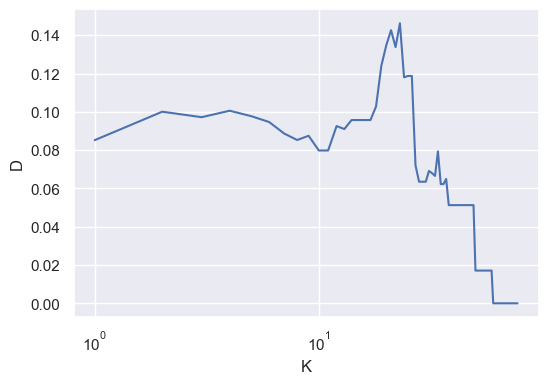

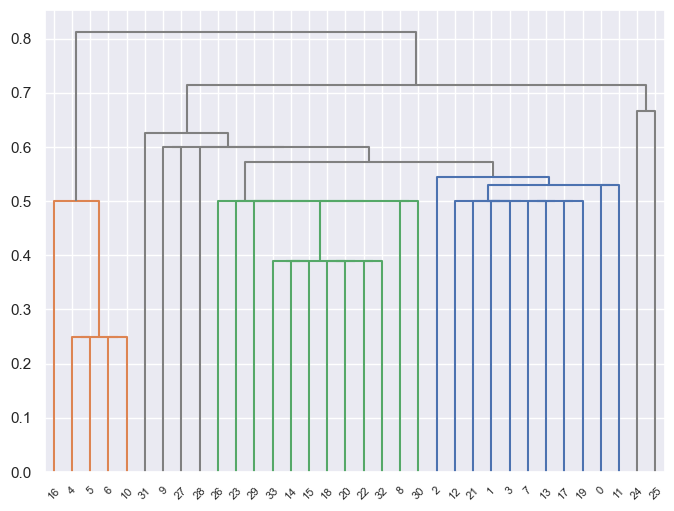

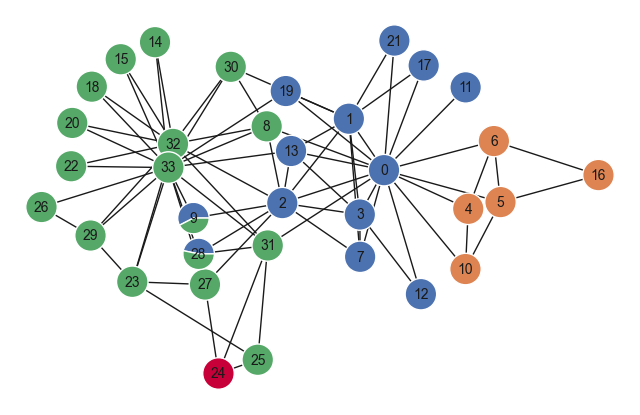

In [4]:
plot_h = Plot_H(H)
k, r = get_best_kr_equivalence(score, H)
rlabels = get_labels_from_Z(H.Z, r)
_, noc_covers, noc_sizes = H.discovery(k, rlabels, undirected=T)
plot_h.plotD(width=6, height=4)
plot_h.nodal_dendrogram([r], cmap_name="deep", width=8, height=6)
plot_h.plot_network_kk(
  NET.A, rlabels, noc_covers, noc_sizes,
  ang=80, font_size=10, undirected=T, width=8, height=6,
  cmap_name="deep"
)